# Modulos

In [ ]:
#!pip3 install --force-reinstall -v  "wikipedia-api==0.5.8"
#!pip3 install beautifulsoup4==4.11.2

In [1]:
import requests
import re
import json
import warnings
import wikipediaapi
from bs4 import BeautifulSoup

warnings.filterwarnings("ignore")

# Principales elementos Web Scraping

## Peticiones HTTP

In [2]:
# Hacemos un pedido a la página de wikipedia
URL = 'https://es.wikipedia.org/'

# Guardamos el objeto que nos devuelve
respuesta = requests.get(URL)

# print(f'Tipo de Objeto: {type(respuesta)} \n')
# print(f'Código de estado: {respuesta.status_code} \n')
print(f'Data: {respuesta.text} \n')

Data: <!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-disabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-not-available" lang="es" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Wikipedia, la enciclopedia libre</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clien

## Uso de APIs

Existen API's que constan de una consulta HHTP con parametros variables, teniendo una conexión sin requerir modulos o conexiones especiales

In [3]:
latitud = -19.42847 
longitud = -99.12766
fecha = '2024-10-25' # AAAA-MM-DD

In [4]:
respuesta_sunset = requests.get(f'https://api.sunrise-sunset.org/json?lat={latitud}&lng={longitud}&date={fecha}')

In [5]:
print(respuesta_sunset)

<Response [200]>


In [5]:
type(respuesta_sunset)

requests.models.Response

In [6]:
datos_sunset = respuesta_sunset.json()
print(datos_sunset)

{'results': {'sunrise': '11:57:49 AM', 'sunset': '12:43:10 AM', 'solar_noon': '6:20:29 PM', 'day_length': '12:45:21', 'civil_twilight_begin': '11:36:21 AM', 'civil_twilight_end': '1:04:38 AM', 'nautical_twilight_begin': '11:09:46 AM', 'nautical_twilight_end': '1:31:13 AM', 'astronomical_twilight_begin': '10:42:47 AM', 'astronomical_twilight_end': '1:58:12 AM'}, 'status': 'OK', 'tzid': 'UTC'}


In [7]:
print("Iterando data_sunset['results']:")
for elemento in datos_sunset['results']:
  print(elemento)

Iterando data_sunset['results']:
sunrise
sunset
solar_noon
day_length
civil_twilight_begin
civil_twilight_end
nautical_twilight_begin
nautical_twilight_end
astronomical_twilight_begin
astronomical_twilight_end


Y otras que contienen muchas más funcionalidades empaquetadas, lo cual permite una busqueda más robusta.

In [8]:
# Instanciamos la clase wikipediaapi y utilizamos el metodo Wikipedia con el parametro de idioma
IDIOMA = 'es'
wiki_wiki = wikipediaapi.Wikipedia(IDIOMA)

# Usamos el metodo page para y hacemos un pedido con una palabra clave
PALABRA_CLAVE = 'web scraping'
wikipedia_programacion = wiki_wiki.page(PALABRA_CLAVE)


In [9]:
print(wikipedia_programacion.title)
print(' ')
print(wikipedia_programacion.summary)

web scraping
 
Web scraping o raspado web es una técnica utilizada mediante programas de software para extraer información de sitios web.[1]​ Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.
El web scraping está muy relacionado con la indexación de la web, la cual indexa la información de la web utilizando un robot y es una técnica universal adoptada por la mayoría de los motores de búsqueda. Sin embargo, el web scraping se enfoca más en la transformación de datos sin estructura en la web (como el formato HTML) en datos estructurados que pueden ser almacenados y analizados en una base de datos central, en una hoja de cálculo o en alguna otra fuente de almacenamiento. Alguno de los usos del web scraping son la comparación de precios en tiendas, la monitorización de datos relacionados con el clima de cierta región, la detección de cambios en sitios webs y la i

## BeautifulSoup
Dicha biblioteca nos ayuda a la extracción de HTML y XML, generando una propuesta de navegación y busqueda más sencilla

In [10]:
# 1. Obtener el HTML
URL_BASE = 'https://es.wikipedia.org/'
pedido_obtenido = requests.get(URL_BASE)
html_obtenido = pedido_obtenido.text

# 2. "Parsear" ese HTML
soup = BeautifulSoup(html_obtenido, "html.parser")

### Principales Métodos

In [11]:
primer_h2 = soup.find('h2')
print(primer_h2)

<h2 class="main-header main-box-header" data-mw-thread-id="h-Gabriel_Fauré-Bienvenidos_a_Wikipedia," id="Gabriel_Fauré"><span id="Gabriel_Faur.C3.A9"></span><span data-mw-comment-start="" id="h-Gabriel_Fauré-Bienvenidos_a_Wikipedia,"></span><a href="/wiki/Gabriel_Faur%C3%A9" title="Gabriel Fauré">Gabriel Fauré</a><span data-mw-comment-end="h-Gabriel_Fauré-Bienvenidos_a_Wikipedia,"></span></h2>


In [12]:
h2_todos = soup.find_all('h2')
print([x.text for x in h2_todos])

['Gabriel Fauré', 'Clint Eastwood', 'Recurso del día', 'Portales', 'Actualidad', '26 de octubre', 'Otros proyectos de la Fundación Wikimedia']


In [13]:
lista = soup.find_all('li', ) #,class_= "mw-list-item"

In [14]:
[x.text for x in lista]

['Portada',
 'Portal de la comunidad',
 'Actualidad',
 'Cambios recientes',
 'Páginas nuevas',
 'Página aleatoria',
 'Ayuda',
 'Notificar un error',
 'Donaciones\n',
 'Crear una cuenta\n',
 'Acceder\n',
 ' Crear una cuenta',
 ' Acceder',
 'Contribuciones',
 'Discusión',
 'Portada',
 'Discusión',
 'Leer',
 'Ver código fuente',
 'Ver historial',
 'Leer',
 'Ver código fuente',
 'Ver historial',
 'Lo que enlaza aquí',
 'Cambios en enlazadas',
 'Subir archivo',
 'Páginas especiales',
 'Enlace permanente',
 'Información de la página',
 'Obtener URL acortado',
 'Descargar código QR',
 'Crear un libro',
 'Descargar como PDF',
 'Versión para imprimir',
 'Wikimedia Commons',
 'Fundación Wikimedia',
 'MediaWiki',
 'Meta-Wiki',
 'Divulgación de Wikimedia',
 'Wikisource multilingüe',
 'Wikiespecies',
 'Wikilibros',
 'Wikidata',
 'Wikifunciones',
 'Wikimanía',
 'Wikinoticias',
 'Wikiquote',
 'Wikisource',
 'Wikiversidad',
 'Wikiviajes',
 'Wikcionario',
 'Elemento de Wikidata',
 'Café',
 '¿Cómo colab

In [15]:
pattern = r"\b\d{1,2}(?:-\d{1,2})? de octubre\b:"
fechas = soup.find_all(string=re.compile(pattern))

In [16]:
fechas

['27 de octubre: ',
 '27 de octubre: Segunda vuelta de las ',
 '27 de octubre: ',
 '27 de octubre: ',
 '27 de octubre: ',
 '27 de octubre: ',
 '26-27 de octubre: ',
 '26-27 de octubre: ',
 '26-27 de octubre: Elecciones ',
 '26 de octubre: ',
 '26 de octubre: ',
 '26 de octubre: ',
 '25-27 de octubre: ',
 '25-27 de octubre: ',
 '25 de octubre: Entrega de los ',
 '21-27 de octubre: Torneos de ',
 '25 de octubre: ',
 '25 de octubre: ',
 '25 de octubre: ',
 '25 de octubre: ',
 '24 de octubre: ',
 '24 de octubre: ',
 '24 de octubre: ',
 '24 de octubre: ',
 '24 de octubre: ',
 '24 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '23 de octubre: ',
 '22 de octubre: ',
 '22 de octubre: ',
 '22 de octubre: ',
 '22 de octubre: ',
 '22 de octubre: ',
 '27 de octubre: ',
 '27 de octubre: Día Nacional de ',
 '27 de octubre: Día Nacional de ',
 '26 de octubre: Día Nacional de ']

## Selenium
Herramienta de código abierto que se utiliza para automatizar navegadores web. Es especialmente útil para realizar pruebas automatizadas de aplicaciones web,

In [17]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
import time

### Driver

In [18]:
driver = webdriver.Chrome()

driver.get("https://www.banxico.org.mx/AplBusquedasBM2/bgenwww_es.jsp")
time.sleep(5)

driver.quit()

The chromedriver version (129.0.6668.91) detected in PATH at C:\SeleniumDrivers\chromedriver.exe might not be compatible with the detected chrome version (130.0.6723.70); currently, chromedriver 130.0.6723.69 is recommended for chrome 130.*, so it is advised to delete the driver in PATH and retry


### Interacción con la página

In [19]:
driver = webdriver.Chrome()
# Abrir la página del Banco de México
driver.get("https://www.banxico.org.mx/AplBusquedasBM2/bgenwww_es.jsp")

# Esperar a que la página cargue completamente
time.sleep(5)

search_bar = driver.find_element(By.NAME, "_userquery")
search_term = "tasa de interés"
search_bar.send_keys(search_term)

# Enviar la búsqueda
search_bar.send_keys(Keys.RETURN)

time.sleep(5)
driver.quit()

The chromedriver version (129.0.6668.91) detected in PATH at C:\SeleniumDrivers\chromedriver.exe might not be compatible with the detected chrome version (130.0.6723.70); currently, chromedriver 130.0.6723.69 is recommended for chrome 130.*, so it is advised to delete the driver in PATH and retry


### Obtención de la información

In [20]:
driver = webdriver.Chrome()
# Abrir la página del Banco de México
driver.get("https://www.banxico.org.mx/AplBusquedasBM2/bgenwww_es.jsp")

# Esperar a que la página cargue completamente
time.sleep(5)

search_bar = driver.find_element(By.NAME, "_userquery")
search_term = "tasa de interés"
search_bar.send_keys(search_term)

# Enviar la búsqueda
search_bar.send_keys(Keys.RETURN)

# Esperar a que los resultados carguen
time.sleep(5)

# Extraer y mostrar los resultados
# Extraer y mostrar los resultados de la tabla
results = driver.find_elements(By.XPATH, "//td[@class='bmtextview']")
for result in results:
    link_element = result.find_element(By.TAG_NAME, "a")
    description_element = result.find_element(By.CLASS_NAME, "bbm_result_fieldvalue")

    title = link_element.text
    link = link_element.get_attribute("href")
    description = description_element.text

    print(f"Título: {title}\nEnlace: {link}\nDescripción: {description}\n")

driver.quit()

The chromedriver version (129.0.6668.91) detected in PATH at C:\SeleniumDrivers\chromedriver.exe might not be compatible with the detected chrome version (130.0.6723.70); currently, chromedriver 130.0.6723.69 is recommended for chrome 130.*, so it is advised to delete the driver in PATH and retry


Título:  destacado  Tasas de interés, disposiciones, Banco de México,  html 
Enlace: https://www.banxico.org.mx/marco-normativo/normativa-emitida-por-el-banco-de-mexico/circular-14-2007/tasas-interes-disposiciones-b.html
Descripción: Tasas de interés, disposiciones, Banco de México. Disposiciones de carácter general en materia de tasas de interés. Tasas de inters, disposiciones, Banco de Mxico. Su navegador no soporta o tiene Javascript deshabilitado. Tasas de interés Texto compilado Circular 14/2007...Circular 14/2007 C......

Título: 2002-03 ¿Qué información sobre las tasas de interés spot futuras contiene la estructura temporal de tasas de interés en México?,  pdf 
Enlace: https://www.banxico.org.mx/publicaciones-y-prensa/documentos-de-investigacion-del-banco-de-mexico/%7BA17CEED7-4615-D373-FB37-AAE2F1B62909%7D.PDF
Descripción: 2002-03 ¿Qué información sobre las tasas de interés spot futuras contiene la estructura temporal de tasas de interés en México?. En este documento se examina

### Iterar sobre la página

In [21]:
# Configurar el navegador
driver = webdriver.Chrome()

# Abrir la página del Banco de México
driver.get("https://www.banxico.org.mx/AplBusquedasBM2/bgenwww_es.jsp")

# Esperar a que la página cargue completamente
time.sleep(5)

# Encontrar la barra de búsqueda
search_bar = driver.find_element(By.NAME, "_userquery")

# Ingresar el término de búsqueda
search_term = "tasa de interés"
search_bar.send_keys(search_term)

# Enviar la búsqueda
search_bar.send_keys(Keys.RETURN)

# Esperar a que los resultados carguen
time.sleep(5)

def extract_results():
    results = driver.find_elements(By.XPATH, "//td[@class='bmtextview']")
    for result in results:
        link_element = result.find_element(By.TAG_NAME, "a")
        description_element = result.find_element(By.CLASS_NAME, "bbm_result_fieldvalue")

        title = link_element.text
        link = link_element.get_attribute("href")
        description = description_element.text

        print(f"Título: {title}\nEnlace: {link}\nDescripción: {description}\n")

# Extraer resultados de la primera página
extract_results()

# Navegar y extraer resultados de las siguientes páginas
i=0
while i<6:
    try:
        next_button = driver.find_element(By.XPATH, "//a[contains(text(), 'Siguiente')]")
        next_button.click()
        time.sleep(5)  # Esperar a que los resultados carguen
        extract_results()
        i+=1
    except:
        break  # Salir del bucle si no hay más páginas

# Cerrar el navegador
driver.quit()

The chromedriver version (129.0.6668.91) detected in PATH at C:\SeleniumDrivers\chromedriver.exe might not be compatible with the detected chrome version (130.0.6723.70); currently, chromedriver 130.0.6723.69 is recommended for chrome 130.*, so it is advised to delete the driver in PATH and retry


Título:  destacado  Tasas de interés, disposiciones, Banco de México,  html 
Enlace: https://www.banxico.org.mx/marco-normativo/normativa-emitida-por-el-banco-de-mexico/circular-14-2007/tasas-interes-disposiciones-b.html
Descripción: Tasas de interés, disposiciones, Banco de México. Disposiciones de carácter general en materia de tasas de interés. Tasas de inters, disposiciones, Banco de Mxico. Su navegador no soporta o tiene Javascript deshabilitado. Tasas de interés Texto compilado Circular 14/2007...Circular 14/2007 C......

Título: 2002-03 ¿Qué información sobre las tasas de interés spot futuras contiene la estructura temporal de tasas de interés en México?,  pdf 
Enlace: https://www.banxico.org.mx/publicaciones-y-prensa/documentos-de-investigacion-del-banco-de-mexico/%7BA17CEED7-4615-D373-FB37-AAE2F1B62909%7D.PDF
Descripción: 2002-03 ¿Qué información sobre las tasas de interés spot futuras contiene la estructura temporal de tasas de interés en México?. En este documento se examina

## Principales elementos PDF Scraping

In [22]:
import os
import re
import tabula
import pandas as pd
from tabula.io import read_pdf
from PyPDF2 import PdfReader

In [23]:
os.environ['JAVA_HOME'] = 'C:\Program Files\Java\jdk-23'

In [25]:
def descargar_archivo(url, nombre_archivo):
    # Realizar la solicitud GET
    response = requests.get(url)
    
    # Verificar que la solicitud fue exitosa
    if response.status_code == 200:
        # Guardar el contenido en un archivo
        with open(nombre_archivo, 'wb') as file:
            file.write(response.content)
        print(f"Archivo descargado: {nombre_archivo}")
    else:
        print(f"Error al descargar el archivo: {response.status_code}")

# Ejemplo de uso
url = "https://www.banxico.org.mx/servicios/cuotas-de-intercambio-por-el-uso-de-tarjetas-de-cr/%7B365D7EE7-594C-358C-4CAC-8A5C583FA4B8%7D.pdf"
nombre_archivo = "familias.pdf"
descargar_archivo(url, nombre_archivo)

Archivo descargado: familias.pdf


### Lectura modo texto

In [26]:
reader = PdfReader("familias.pdf")
numero_de_paginas = len(reader.pages)
pagina = reader.pages[0]
texto = pagina.extract_text()

In [27]:
print(texto)

Cuotas de intercambio por el uso de tarjetas de crédito en terminales punt o de venta
Tipo de comercio Cuotas de intercambio
Beneficencia 0%
Gasolineras 1.10%
Colegios y Universidades1.25%Gobierno
Grandes Superficies 1.64%
Comida Rápida1.61%Peaje
Farmacias 1.53%
Estacionamientos 1.22%
Supermercados 1.77%
Transporte terrestre de 
pasajeros1.30%
Renta de Autos 1.71%
Agencias de Viaje1.80%Hoteles
Entretenimiento 1.37%
Transporte Aéreo 1.62%
Telecomunicaciones 1.56%
Aseguradoras 1.66%
Hospitales 1.74%
Restaurantes 1.91%
Ventas al menudeo1.68%Otros
Información vigente desde enero de 2008.
  


### Tratamiento de tabla

El parametro lattice, se basa en las lineas y cuadriculas de la tabla para detectar y limitar el contenido

In [28]:
extraccion_metodo1 = read_pdf("familias.pdf", pages="all", encoding='latin1',lattice=True ) 

Failed to import jpype dependencies. Fallback to subprocess.
No module named 'jpype'


In [29]:
extraccion_metodo1[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Tipo de comercio,NaN,Cuotas de intercambio
1,NaN,NaN,NaN
2,Beneficencia,NaN,0%
3,Gasolineras,NaN,1.10%
4,Colegios y Universidades,NaN,NaN
5,NaN,NaN,NaN
6,Gobierno,NaN,NaN
7,NaN,NaN,NaN
8,Grandes Superficies,NaN,1.64%
9,Comida Rápida,NaN,NaN


En cambio stream se basa en el flujo de las palabras, por lo cual importa mucho la alineación del texto y por ende las filas que toman más de un reglon le generan problemas

In [30]:
extraccion_metodo2 = read_pdf("familias.pdf", pages="all", encoding='latin1',stream=True ) 

In [31]:
extraccion_metodo2[0]

,Tipo de comercio,Cuotas de intercambio
0,Beneficencia,0%
1,Gasolineras,1.10%
2,Colegios y Universidades,NaN
3,NaN,1.25%
4,Gobierno,NaN
5,Grandes Superficies,1.64%
6,Comida Rápida,NaN
7,NaN,1.61%
8,Peaje,NaN
9,Farmacias,1.53%


In [32]:
extraccion_metodo3 = read_pdf("familias.pdf", pages="all", encoding='latin1',stream=True, lattice=True ) 

In [33]:
extraccion_metodo3[0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Tipo de comercio,NaN,Cuotas de intercambio
1,NaN,NaN,NaN
2,Beneficencia,NaN,0%
3,Gasolineras,NaN,1.10%
4,Colegios y Universidades,NaN,NaN
5,NaN,NaN,NaN
6,Gobierno,NaN,NaN
7,NaN,NaN,NaN
8,Grandes Superficies,NaN,1.64%
9,Comida Rápida,NaN,NaN


## Visualización 

In [34]:
data = read_pdf("PDFs/Descuento Credito Agencias de viajes.pdf", pages="all", encoding='latin1',stream=True ) 

In [35]:
df=data[0]
df.columns =["Institucion", "Promedio", "Minima", "Maxima", "Desviacion",  "Moda"]
df

,Institucion,Promedio,Minima,Maxima,Desviacion,Moda
0,EVO (1),1.95%,1.79%,2.60%,0.14%,1.95%
1,Mifel,2.12%,1.60%,2.80%,0.44%,1.68%
2,Dlocal (2),2.15%,2.15%,2.15%,-,2.15%
3,Getnet (3),2.19%,1.76%,3.50%,0.28%,2.13%
4,Afirme,2.25%,1.60%,3.90%,0.33%,2.40%
5,Banorte,2.25%,1.58%,2.80%,0.32%,2.00%
6,BBVA Bancomer,2.27%,1.58%,2.40%,0.15%,2.25%
7,Autofin,2.27%,2.00%,2.40%,0.19%,2.00%
8,Inbursa,2.32%,1.78%,2.60%,0.10%,2.34%
9,Adyen (4),2.32%,2.25%,2.45%,0.12%,2.25%


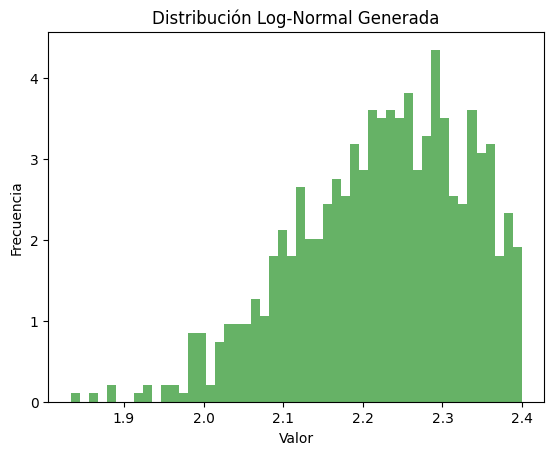

In [36]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
# Estadísticos de la muestra
promedio = 2.27
minimo = 1.58
maximo = 2.40
desviacion = 0.15
moda = 2.25

# Calcular los parámetros de la distribución log-normal
mu = np.log(promedio**2 / np.sqrt(desviacion**2 + promedio**2))
sigma = np.sqrt(np.log(1 + (desviacion**2 / promedio**2)))

# Generar una muestra de la distribución log-normal
muestra = np.random.lognormal(mu, sigma, 1000)

# Filtrar la muestra para que esté dentro del rango [minimo, maximo]
muestra = muestra[(muestra >= minimo) & (muestra <= maximo)]

# Graficar la distribución
plt.hist(muestra, bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribución Log-Normal Generada')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [37]:
vals, counts = np.unique(muestra, return_counts=True)

# Identificar la moda
mode_index = np.argmax(counts)
mode_value = vals[mode_index]

np.round(muestra.mean(),2), np.round(muestra.std(), 2), np.round(mode_value,2)

(np.float64(2.22), np.float64(0.11), np.float64(1.83))

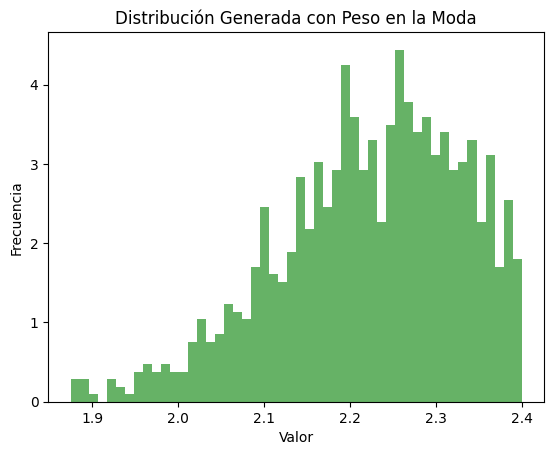

In [40]:
# Estadísticos de la muestra
promedio = 2.27
minimo = 1.58
maximo = 2.40
desviacion = 0.15
moda = 2.25

# Calcular los parámetros de la distribución log-normal
mu = np.log(promedio**2 / np.sqrt(desviacion**2 + promedio**2))
sigma = np.sqrt(np.log(1 + (desviacion**2 / promedio**2)))

# Generar una muestra de la distribución log-normal
muestra_lognormal = np.random.lognormal(mu, sigma, 1000)

# Generar una muestra alrededor de la moda
muestra_moda = np.random.normal(moda, desviacion / 2, 200)

# Combinar ambas muestras
muestra = np.concatenate((muestra_lognormal, muestra_moda))

# Filtrar la muestra para que esté dentro del rango [minimo, maximo]
muestra = muestra[(muestra >= minimo) & (muestra <= maximo)]

# Graficar la distribución
plt.hist(muestra, bins=50, density=True, alpha=0.6, color='g')
plt.title('Distribución Generada con Peso en la Moda')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [41]:
vals, counts = np.unique(muestra, return_counts=True)

# Identificar la moda
mode_index = np.argmax(counts)
mode_value = vals[mode_index]

np.round(muestra.mean(),2), np.round(muestra.std(), 2), np.round(mode_value,2)

(np.float64(2.22), np.float64(0.11), np.float64(1.88))